In [3]:
import os
import numpy as np # linear algebra.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv).
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading metadata input.
metal_excel_dir = "../input/audio-based-violence-detection-dataset/VSD.xlsx"
metadata = pd.read_excel(metal_excel_dir,sheet_name='read_dataset')

In [5]:
# Cleaning metadata input.
metadata = metadata.drop(metadata[metadata['File_segment_name'] == "NaN"].index)
metadata.shape

(341, 5)

In [6]:
metadata.head(10)

,File_segment_name,Duration,Violence_start,Violence_end,Violence_duration
0,angry_011,117.0,21.0,38.000,17.00
1,angry_011,117.0,40.0,55.000,15.00
2,angry_011,117.0,60.0,79.000,19.00
3,angry_011,117.0,85.0,95.000,10.00
4,angry_011,117.0,101.0,110.000,9.00
5,angry_012,32.0,0.0,0.020,0.02
6,angry_013,72.0,0.0,0.010,0.00
7,angry_014,50.0,0.0,0.012,0.00
8,angry_015,162.0,64.0,71.000,7.00
9,angry_015,162.0,89.0,100.000,11.00


In [7]:
# Creating directory paths to store violence and non-violence data.
violence_dir = "../violence_data"
non_violence_dir = "../non_violence_data"

In [8]:
# Creating Directories.
os.mkdir(violence_dir)
os.mkdir(non_violence_dir)

In [9]:
# We have segments of audio in our data, Hence importing pydub to process segments.
from pydub import AudioSegment

# Looping over all the records in metadata input.
for record in metadata.values:
    t1 = 1000 * record[2]
    t2 = 1000 * record[3]
    audio  = AudioSegment.from_wav(os.path.join("../input/audio-based-violence-detection-dataset/audios_VSD/audios_VSD", str(record[0]) + ".wav"))
    violence_segment = audio[t1:t2]
    # Storing the violence audio segment in the corresponding directory.
    violence_segment.export(os.path.join(violence_dir,record[0]+".wav"))
    
print("===== Violent audio segments separated =====")

===== Violent audio segments separated =====


In [10]:
for record in metadata.values:
    t1 = 1000 * record[2]
    t2 = 1000 * record[3]
    audio  = AudioSegment.from_wav(os.path.join("../input/audio-based-violence-detection-dataset/audios_VSD/audios_VSD", str(record[0]) + ".wav"))
    non_violence_segment = audio[0:t1]
    non_violence_segment.export(os.path.join(non_violence_dir,record[0]+"_non_violence.wav"))

print("===== Non-violent audio segments separated =====")

===== Non-violent audio segments separated =====


In [11]:
# Importing Librosa to extract audio features.
import librosa

# Function to extract MFCC (Mel Frequency Cepstral Coefficients) from the audio sample.
def features_extractor(file):
    audio, sample_rate = librosa.load(file) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    # We do mean of transpose of value to find out scaled feature.
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [12]:
# Creating empty list to store the extracted features.
extracted_features=[]

# Loop to process violent data extraction process.
for record in metadata.values:
    file_name = os.path.join(os.path.abspath(violence_dir), record[0] + ".wav")
    # Labelling violent audio as 1.
    final_class_labels = 1 
    try:
        data = features_extractor(file_name)
    except:
        continue
    extracted_features.append([data,final_class_labels])
print("===== Successfully extracted violent audio data =====")

# Loop to process non-violent data extraction process.
for record in metadata.values:
    file_name = os.path.join(os.path.abspath(non_violence_dir),record[0]+"_non_violence.wav")
    # Labelling non-violent audio as 0.
    final_class_labels = 0
    try:
        data = features_extractor(file_name)
    except:
        continue
    extracted_features.append([data,final_class_labels])
print("===== Successfully extracted non-violent audio data =====")

===== Successfully extracted violent audio data =====


[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
[src/libmpg123/parse.c:do_readahead():1099] warning: Ca

===== Successfully extracted non-violent audio data =====


[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...


In [13]:
# Converting extracted_features to Pandas dataframe.
extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-136.46625, 114.69909, -33.55017, 21.952213, ...",1
1,"[-136.46625, 114.69909, -33.55017, 21.952213, ...",1
2,"[-136.46625, 114.69909, -33.55017, 21.952213, ...",1
3,"[-136.46625, 114.69909, -33.55017, 21.952213, ...",1
4,"[-136.46625, 114.69909, -33.55017, 21.952213, ...",1


In [14]:
# Checking Value counts.
extracted_features_df["class"].value_counts()

class
1    341
0    315
Name: count, dtype: int64

In [15]:
# Split the dataset into independent and dependent dataset.
X = np.array(extracted_features_df["feature"].tolist())
y = np.array(extracted_features_df["class"].tolist())

# Train Test Split.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [16]:
print(X_train.shape, X_test.shape)

(590, 40) (66, 40)


In [17]:
# Reshaping to make the datasets compatible with LSTM.
X_train=X_train.reshape(590,1,40)
X_test=X_test.reshape(66,1, 40)
print(X_train.shape, X_test.shape)

(590, 1, 40) (66, 1, 40)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

# No of classes.
num_labels=y.shape[0]
model=Sequential()
model.add(LSTM(64,input_shape=(1,40)))

### 1st layer.
model.add(Dense(32))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))

### 2nd layer.
#model.add(Dense(128))
#model.add(Activation('relu'))
#model.add(Dropout(0.4))

### 3rd layer.
#model.add(Dense(64))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))

### 4th layer.
#model.add(Dense(32))
#model.add(Activation('relu'))

### 5th layer.
#model.add(Dense(16))
#model.add(Activation('relu'))

### 6th layer.
#model.add(Dense(8))
#model.add(Activation('relu'))

### Final layer.
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [19]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                26880     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 28,993
Trainable params: 28,993
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Model Compilation.
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [32]:
# Trianing model.
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
num_epochs = 10
num_batch_size = 32
checkpointer = ModelCheckpoint(filepath='./audio_classification.hdf5', verbose=1, save_best_only=True)
start = datetime.now()
history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
duration = datetime.now() - start
print("Training completed in time:", duration)

Epoch 1/10
12/19 [=================>............] - ETA: 0s - loss: 0.1995 - accuracy: 0.9505
Epoch 1: val_loss improved from inf to 0.24045, saving model to ./audio_classification.hdf5
19/19 [==============================] - 0s 11ms/step - loss: 0.1925 - accuracy: 0.9492 - val_loss: 0.2405 - val_accuracy: 0.9091
Epoch 2/10
13/19 [===================>..........] - ETA: 0s - loss: 0.1549 - accuracy: 0.9736
Epoch 2: val_loss improved from 0.24045 to 0.23320, saving model to ./audio_classification.hdf5
19/19 [==============================] - 0s 8ms/step - loss: 0.1650 - accuracy: 0.9678 - val_loss: 0.2332 - val_accuracy: 0.8939
Epoch 3/10
13/19 [===================>..........] - ETA: 0s - loss: 0.1547 - accuracy: 0.9639
Epoch 3: val_loss improved from 0.23320 to 0.22081, saving model to ./audio_classification.hdf5
19/19 [==============================] - 0s 8ms/step - loss: 0.1483 - accuracy: 0.9644 - val_loss: 0.2208 - val_accuracy: 0.9091
Epoch 4/10
12/19 [=================>..........

In [33]:
# Evaluating the model on testing data.
test_accuracy = model.evaluate(X_test,y_test,verbose=0)
print("Test accuracy of the model:", test_accuracy[1])

Test accuracy of the model: 0.939393937587738


In [34]:
# Evaluating the model on training data.
train_accuracy = model.evaluate(X_train,y_train,verbose=0)
print("Train accuracy of the model:", train_accuracy[1])

Train accuracy of the model: 0.9830508232116699


In [35]:
# Prediction on test data.
predict_x = model.predict(X_test)
print(predict_x)
#classes_x = np.argmax(predict_x,axis=1)
#print(classes_x)

3/3 [==============================] - 0s 4ms/step
[[9.9945658e-01]
 [9.9963039e-01]
 [9.7317600e-01]
 [1.5324728e-02]
 [5.2978927e-03]
 [9.9002236e-01]
 [7.1934515e-01]
 [9.9963039e-01]
 [9.8359995e-02]
 [7.8854787e-01]
 [9.8690200e-01]
 [9.9998593e-01]
 [1.9590400e-02]
 [7.9770591e-03]
 [8.3508104e-01]
 [5.7564909e-04]
 [6.2633032e-01]
 [8.3508104e-01]
 [4.0484142e-02]
 [7.8854787e-01]
 [1.3607748e-01]
 [4.0747449e-01]
 [3.4176096e-02]
 [3.3768378e-02]
 [2.3204958e-02]
 [2.4396742e-02]
 [9.8454106e-01]
 [2.3204958e-02]
 [9.6980059e-01]
 [9.9779701e-01]
 [9.9497861e-01]
 [9.8577815e-01]
 [9.8690200e-01]
 [9.4911045e-01]
 [9.9497861e-01]
 [9.9802846e-01]
 [3.3768378e-02]
 [5.6910984e-02]
 [9.8474079e-01]
 [9.9998593e-01]
 [1.5324728e-02]
 [2.4554513e-03]
 [9.9017817e-01]
 [7.8854787e-01]
 [6.8620330e-01]
 [1.0119351e-01]
 [5.2041131e-01]
 [9.2644638e-01]
 [9.8238218e-01]
 [9.9801195e-01]
 [8.7459207e-02]
 [9.5195162e-01]
 [5.7564909e-04]
 [9.9887007e-01]
 [9.8905671e-01]
 [6.7949355e-0

In [37]:
# Saving the model.
model.save("model_LSTM_v2.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


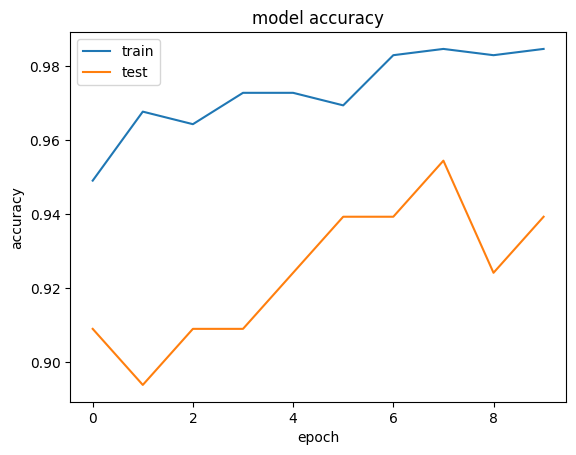

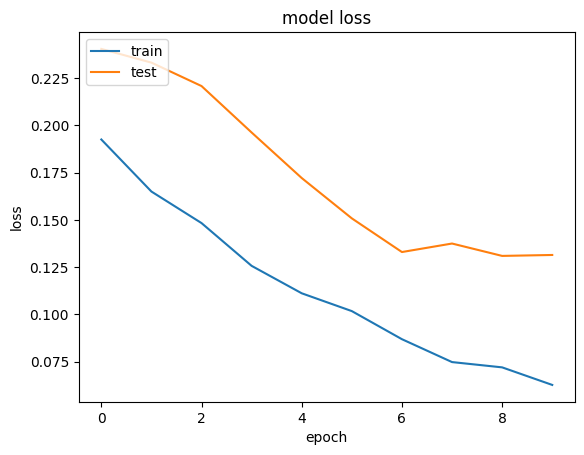

In [38]:
print(history.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()